# Premier exemple

## Création des données à afficher

In [1]:
import numpy as np
x = np.linspace(-np.pi, np.pi, 512, endpoint=True)
c, s = np.cos(x), np.sin(x)

## Création d'une figure avec les paramètres par défaut

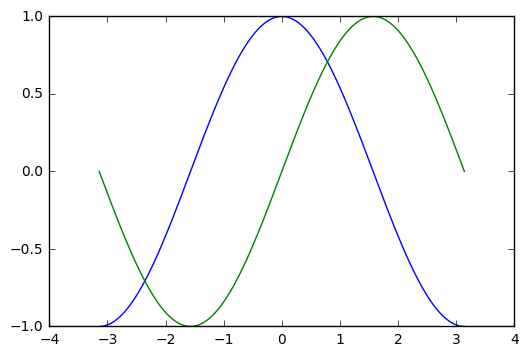

In [2]:
# Magic command (affichage du graphique sans appel à plt.show())
%matplotlib inline
from matplotlib import pyplot as plt
#from matplotlib import style

#style.use('ggplot')

plt.plot(x, c)
plt.plot(x, s)

## Quels sont les paramètres par défaut ?

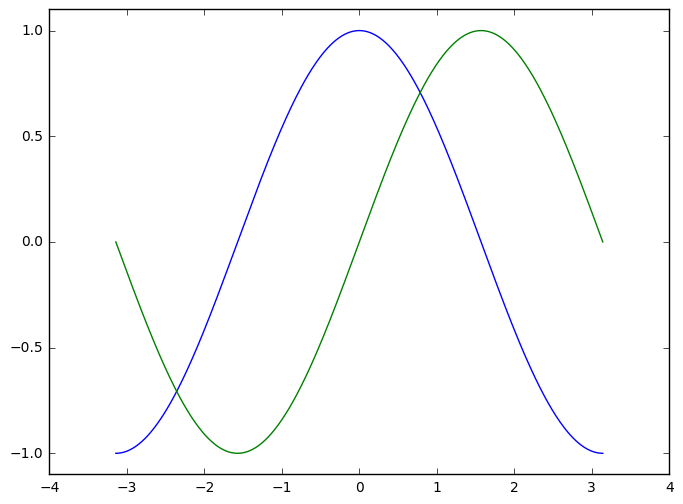

In [3]:
# Création d'une figure de dimensions 8 x 6 points, de densité 100 points par pouce
plt.figure(figsize=(8, 6), dpi=80)  

# Création d'une sous-figure
plt.subplot(111)

# Plots
plt.plot(x, c, color="blue", linewidth=1.0, linestyle='-')
plt.plot(x, s, color="green", linewidth=1.0, linestyle='-')

# Limites pour l'axe des abscisses
plt.xlim(-4.0, 4.0)
# Limites pour l'axe des ordonnées
plt.ylim(-1.1, 1.1)

# Marqueurs pour l'axe des abscisses
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))
# Marqueurs pour l'axe des ordonnées
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

# Sauvegarde de la figure
plt.savefig("./fig_defaults.png", dpi=100)

# Affichage
#plt.show()

## Améliorations

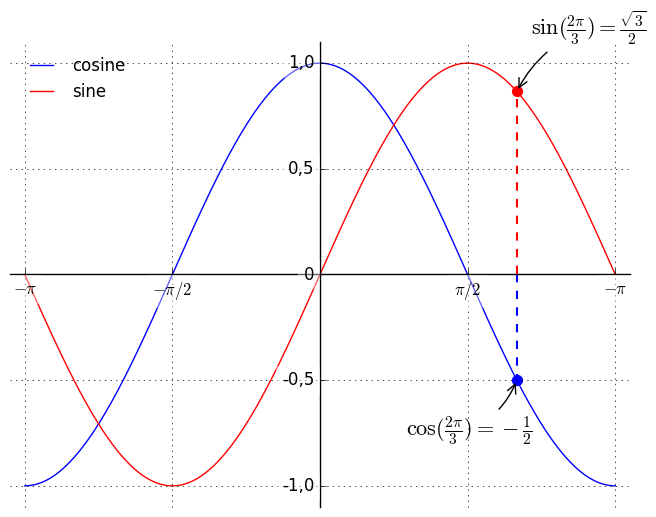

In [4]:
# Création d'une figure de dimensions 8 x 6 points, de densité 100 points par pouce
plt.figure(figsize=(8, 6), dpi=80)  

# Création d'une sous-figure
plt.subplot(111)

# Plots
plt.plot(x, c, color="blue", linewidth=1.0, linestyle='-', label='cosine')
plt.plot(x, s, color="red", linewidth=1.0, linestyle='-', label='sine')

# Limites pour l'axe des abscisses
plt.xlim(x.min()*1.05, x.max()*1.05)
# Limites pour l'axe des ordonnées
plt.ylim(c.min()*1.1, c.max()*1.1)

# Marqueurs pour l'axe des abscisses
plt.xticks([-np.pi, -np.pi/2, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$\pi/2$', r'$-\pi$'])
# Marqueurs pour l'axe des ordonnées
plt.yticks([-1, -0.5, 0, 0.5, 1],
           [r'-1,0', r'-0,5', r'0', r'0,5', r'1,0'])

# Choix des positions des axes de référence (4 : bas, haut, droite, gauche)
ax = plt.gca()  # what is the current axe
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Faire en sorte que les marqueurs de l'axe des abscisses ne soient pas masqués par la courbe
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.4))


# Grille
plt.grid()

# Légende
plt.legend(loc='upper left', frameon=False)

# Mettre quelques points en évidence et ajouter des annotations
t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=1.5, linestyle="--")  # Trait vertical entre (t,0) et (t, cos(t))
plt.scatter([t,], [np.cos(t),], 50, color='blue')  # Point de coordonnées (t, cos(t))

plt.plot([t, t], [0, np.sin(t)], color='red', linewidth=1.5, linestyle="--")  # Trait vertical entre (t,0) et (t, sin(t))
plt.scatter([t,], [np.sin(t),], 50, color='red')  # Point de coordonnées (t, sin(t))

plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
            xy=(t, np.sin(t)), xycoords='data',
            xytext=(+10, +40), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))  # Annotation 1

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
            xy=(t, np.cos(t)), xycoords='data',
            xytext=(-80, -40), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))  # Annotation 1

# Sauvegarde de la figure
plt.savefig("./fig_defaults.svg")

# Affichage
#plt.show()

# Deuxième exemple

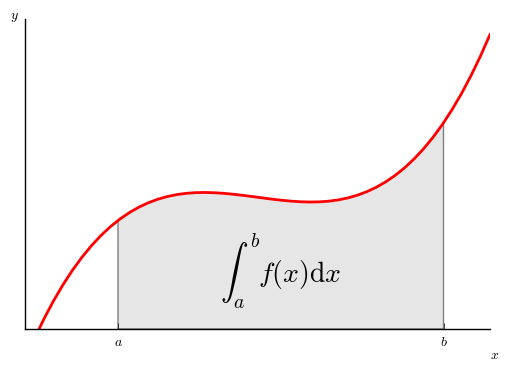

In [2]:
# %load http://matplotlib.org/mpl_examples/showcase/integral_demo.py
"""
Plot demonstrating the integral as the area under a curve.

Although this is a simple example, it demonstrates some important tweaks:

    * A simple line plot with custom color and line width.
    * A shaded region created using a Polygon patch.
    * A text label with mathtext rendering.
    * figtext calls to label the x- and y-axes.
    * Use of axis spines to hide the top and right spines.
    * Custom tick placement and labels.
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()
